# Import Libraries & Functions

In [1]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

import os
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [2]:
dataset_train='./dataset/train'
dataset_test ='./dataset/test'

In [3]:
from keras.preprocessing.image import img_to_array, load_img

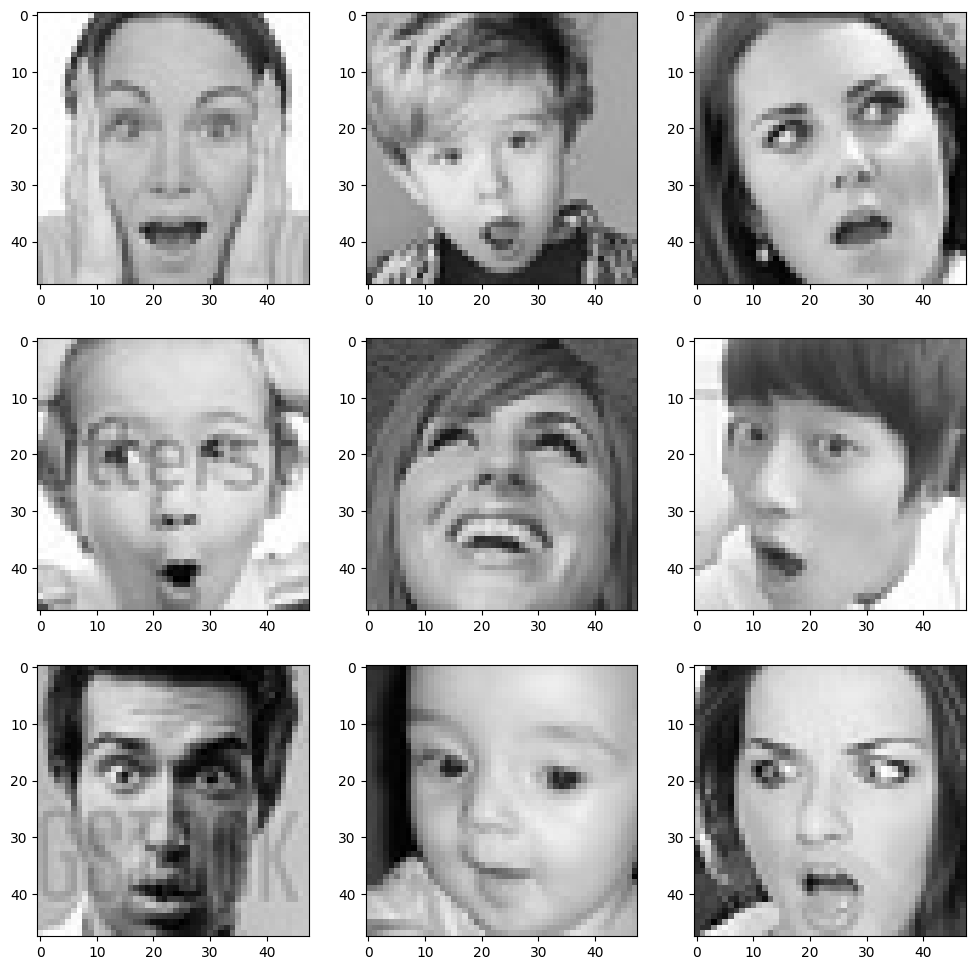

In [4]:

plt.figure(figsize= (12,12))
for expression in os.listdir(dataset_train):
    for i in range(1, 10, 1):
        plt.subplot(3,3,i)
        img = load_img(dataset_train + '/' + expression +"/" + os.listdir(dataset_train + '/' + expression)[i], target_size=(48, 48))
        plt.imshow(img)   
plt.show()

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
datagen_train  = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
datagen_val = ImageDataGenerator(rescale = 1./255)

train_set = datagen_train.flow_from_directory(dataset_train,
                                              target_size = (48, 48),
                                              color_mode = "grayscale",
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(dataset_test,
                                              target_size = (48, 48),
                                              color_mode = "grayscale",
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
class_labels = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

In [8]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(32 ,kernel_size=(3,3), activation='relu', input_shape = (48,48,1)))

#2nd CNN layer
model.add(Conv2D(64 ,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

#3rd CNN layer
model.add(Conv2D(128 ,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

#4th CNN layer
model.add(Conv2D(256 ,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

model.add(Flatten())

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(no_of_classes, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

d:\HOANG\ComputerVision\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,489,095 (9.50 MB)

 Trainable params: 2,489,095 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
num_train_files = 0
for root, dirs, files in os.walk(dataset_train):
    num_train_files += len(files)

num_test_files = 0
for root, dirs, files in os.walk(dataset_test):
    num_test_files += len(files)


In [10]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

"""
checkpoint = ModelCheckpoint("model.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])
"""

'\ncheckpoint = ModelCheckpoint("model.keras", monitor=\'val_acc\', verbose=1, save_best_only=True, mode=\'max\')\n\nearly_stopping = EarlyStopping(monitor=\'val_loss\',\n                          min_delta=0,\n                          patience=3,\n                          verbose=1,\n                          restore_best_weights=True\n                          )\n\nreduce_learningrate = ReduceLROnPlateau(monitor=\'val_loss\',\n                              factor=0.2,\n                              patience=3,\n                              verbose=1,\n                              min_delta=0.0001)\n\ncallbacks_list = [early_stopping,checkpoint,reduce_learningrate]\n\nmodel.compile(loss=\'categorical_crossentropy\',\n              optimizer = Adam(learning_rate=0.001),\n              metrics=[\'accuracy\'])\n'

In [11]:
print(num_train_files)
print(num_test_files)

28709
7178


In [12]:
history = model.fit(train_set,
                    steps_per_epoch=num_train_files//32,
                    epochs=100,
                    validation_data = test_set,
                    validation_steps = num_test_files//32,
                    )

Epoch 1/100


d:\HOANG\ComputerVision\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 272s 298ms/step - accuracy: 0.2492 - loss: 1.8116 - val_accuracy: 0.3115 - val_loss: 1.7180
Epoch 2/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - accuracy: 0.3750 - loss: 1.5310 - val_accuracy: 0.4000 - val_loss: 1.7265
Epoch 3/100


D:\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


897/897 ━━━━━━━━━━━━━━━━━━━━ 216s 240ms/step - accuracy: 0.3068 - loss: 1.7079 - val_accuracy: 0.4155 - val_loss: 1.4841
Epoch 4/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 110us/step - accuracy: 0.3438 - loss: 1.5315 - val_accuracy: 0.7000 - val_loss: 1.1774
Epoch 5/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 215s 239ms/step - accuracy: 0.3834 - loss: 1.5753 - val_accuracy: 0.4580 - val_loss: 1.4044
Epoch 6/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 92us/step - accuracy: 0.4688 - loss: 1.4817 - val_accuracy: 0.5000 - val_loss: 1.4732
Epoch 7/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 216s 241ms/step - accuracy: 0.4276 - loss: 1.4789 - val_accuracy: 0.4985 - val_loss: 1.3118
Epoch 8/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 100us/step - accuracy: 0.4062 - loss: 1.5757 - val_accuracy: 0.6000 - val_loss: 1.1046
Epoch 9/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 230s 255ms/step - accuracy: 0.4601 - loss: 1.4001 - val_accuracy: 0.5133 - val_loss: 1.2573
Epoch 10/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 99us/step - accuracy: 0.4375 - loss: 1.3850

In [13]:
model.save("best_model.keras")

In [14]:
h = history.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

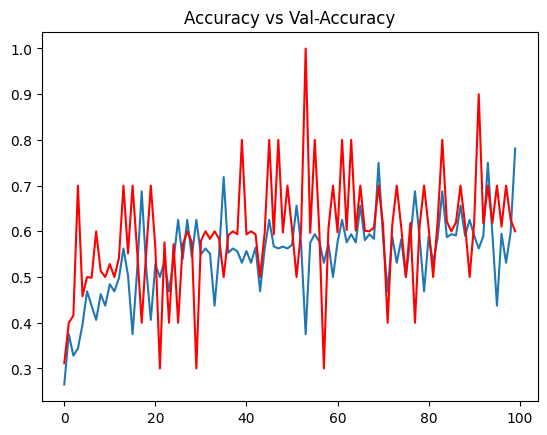

In [15]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("Accuracy vs Val-Accuracy")
plt.show()

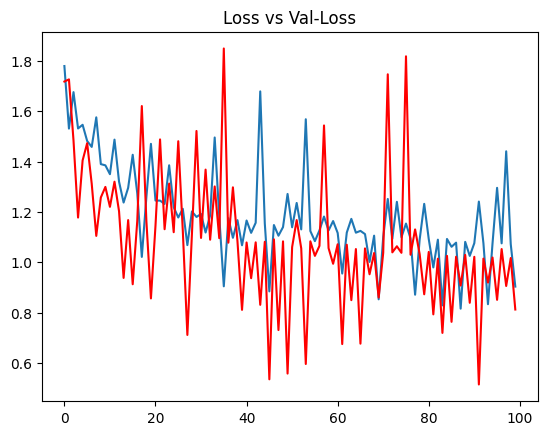

In [16]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("Loss vs Val-Loss")
plt.show()

In [17]:
# Load the best fit model
from keras.models import load_model
model = load_model("best_model.keras")

In [26]:
import matplotlib.image as mpimg

Input shape: (1, 48, 48, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Raw model predictions: [[1.1066881e-01 2.8232465e-04 1.3346952e-01 3.3825645e-01 1.8188483e-01
  1.5385185e-01 8.1586182e-02]]
Predicted emotion index: 3
The predicted emotion is Happy


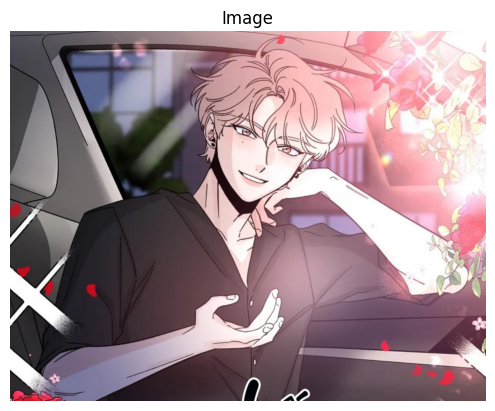

In [27]:
# Path to your uploaded image
path = "LeeJooBin.png"  # Update this with the correct filename of your uploaded image

# Load the image
image = mpimg.imread(path)

# Load the image
img = load_img(path, target_size=(48, 48), color_mode='grayscale')

# Convert the image to array and normalize
img_array = img_to_array(img) / 255.0

# Expand dimensions to match the input shape for the model
input_arr = np.expand_dims(img_array, axis=0)

# Check the shape of the input array
print("Input shape:", input_arr.shape)

# Load the best fit model
from keras.models import load_model
model = load_model("best_model.keras")

# Predict the emotion
predictions = model.predict(input_arr)
print("Raw model predictions:", predictions)

# Get the predicted emotion
pred = np.argmax(predictions)
print(f"Predicted emotion index: {pred}")

# Define a dictionary to map numeric labels to emotion names (modify this according to your dataset)
emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

# Print the predicted emotion
print(f"The predicted emotion is {emotion_labels[pred]}")

# Display the image
plt.imshow(image)
plt.title("Image")
plt.axis('off')
plt.show()